**Лабораторная работа №2
Гистограммы, профили и проекции**

**Цель работы:** Освоение основных яркостных и геометрических характеристик
изображений и их использование для анализа изображений.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

**1. Гистограммы. Выбрать произвольное слабоконтрастное изображение. Выполнить выравнивание гистограммы и растяжение контраста, использовать рассмотренные преобразования и встроенные функции пакета MATLAB, с использованием библиотеки OpenCV и языков программирования C++, PYTHON. Сравнить полученные результаты.**

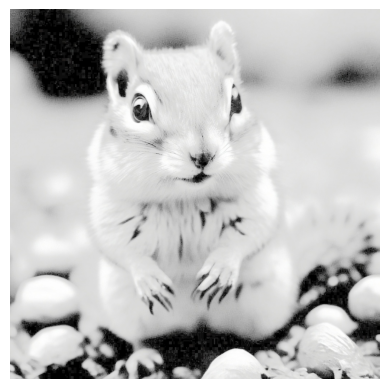

In [2]:
I = cv2.imread("hamster.jpg")
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.imshow(I)
plt.axis('off')
plt.show()
# cv2.imshow('cat', image1)
# cv2.waitKey(0)

Ниже для удобства показ гистограммы вынесен в отдельную функцию, которая принимает изображение (на основе которого будет сделана гистрограмма) и заголовок для графика.

In [3]:
def showHist(img, histTitle):
    # I is an RGB - image
    # Number of histogram bins
    histSize = 256
    # Histogram range
    # The upper boundary is exclusive
    histRange = (1, 255)
    # Split an image into color layers
    # OpenCV stores RGB image as BGR
    I_BGR = cv2.split(img)
    # Calculate a histogram for each layer
    bHist = cv2.calcHist (I_BGR , [0] , None , [ histSize ], histRange )
    gHist = cv2.calcHist (I_BGR , [1] , None , [ histSize ], histRange )
    rHist = cv2.calcHist (I_BGR , [2] , None , [ histSize ], histRange )

    plt.figure(figsize=(7,3))
    plt.title(histTitle)
    plt.plot(bHist, color = 'blue')
    plt.plot(gHist, color = 'green')
    plt.plot(rHist, color = 'red')

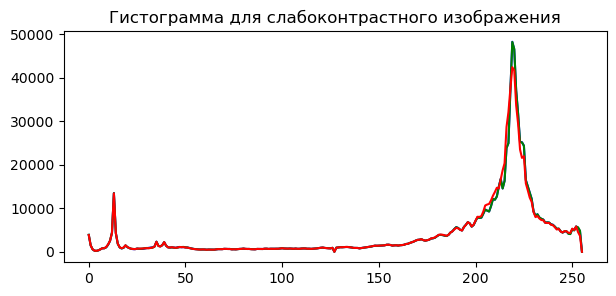

In [4]:
showHist(I, "Гистограмма для слабоконтрастного изображения")

Так как изображение изначально тёмное. Чтобы на изображении было легче увидеть детали, применим Растяжение динамического диапазона.

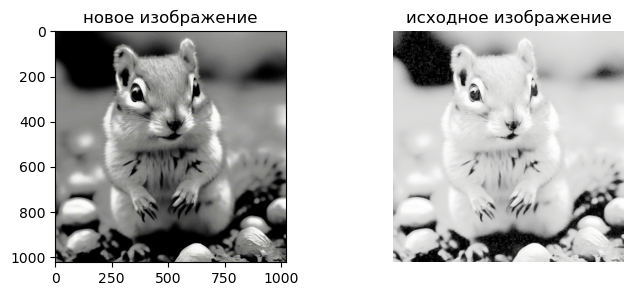

In [5]:
alfa = 4
# Convert to floating point
if I. dtype == np. uint8 :
    Inew = I. astype (np. float32 ) / 255
else :
    Inew = I
# We need to process layers separately
I_BGR = cv2.split ( Inew )
Inew_BGR = []
for layer in I_BGR :
    Imin = layer.min ()
    Imax = layer.max ()
    Inew = np.clip (((( layer - Imin ) /( Imax - Imin )) ** alfa ), 0, 1)
    Inew_BGR.append ( Inew )
# Merge back
Inew = cv2. merge ( Inew_BGR )
# Convert back to uint if needed
if (I. dtype == np. uint8 ):
    Inew = (255 * Inew ). clip (0, 255). \
        astype (np. uint8 )
        
plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
plt.title('новое изображение')
plt.imshow(Inew)

plt.subplot(1, 2, 2)
plt.title('исходное изображение')
plt.imshow(I)
plt.axis('off')
plt.show()


После применения преобразования на изображении стали видны многие детали.

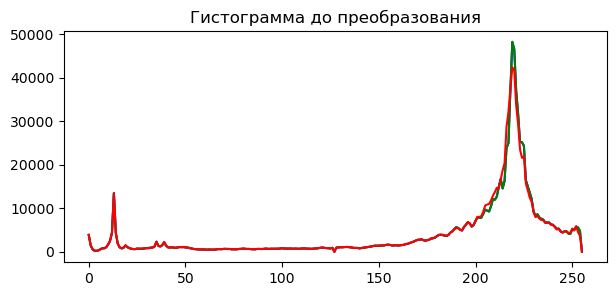

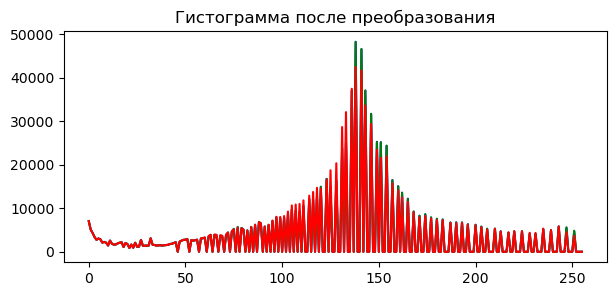

In [6]:
showHist(I, "Гистограмма до преобразования")
showHist(Inew, "Гистограмма после преобразования")

In [7]:
'''
for i in range(I.shape[0]):
    for j in range(I.shape[1]):
        val = I[i, j].astype(np.float32)
        Inew[i, j] = alpha ** CH[I[i, j][k]]
'''

'\nfor i in range(I.shape[0]):\n    for j in range(I.shape[1]):\n        val = I[i, j].astype(np.float32)\n        Inew[i, j] = alpha ** CH[I[i, j][k]]\n'

**2. Проекции. Выбрать произвольное изображение, содержащее монотонные области и выделяющиеся объекты. Произвести построение проекций изображения на вертикальную и горизонтальную оси. Определить границы областей объектов.**

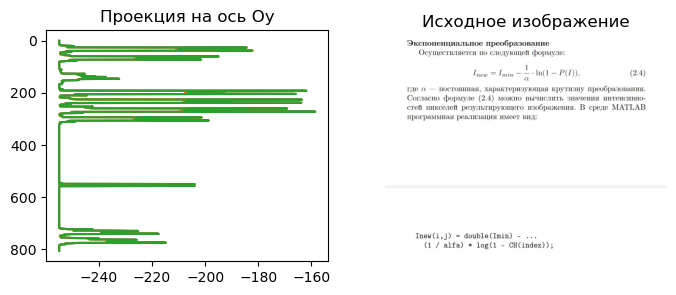

Границы:  640.40234375 ... 1027.96875


In [8]:
img = cv2.imread('text.jpg')
h,w = img.shape[0], img.shape[1]
ratio = h/w

rrange = range(img.shape[0])
plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
plt.title('Проекция на ось Oy')
plt.plot(-img.mean(axis=1), rrange)
plt.gca().invert_yaxis() # зеркалим по горизонтали

plt.subplot(1, 2, 2)
plt.title('Исходное изображение')
plt.imshow(img)
plt.axis('off')
plt.show()

ProjYK = np.sum(img, (1,2))
ProjYK = ProjYK / 256 / img.shape[2] # img.shape[] это width (0), height (1), channels (2)
print("Границы: ", ProjYK.min(), "...", ProjYK.max())


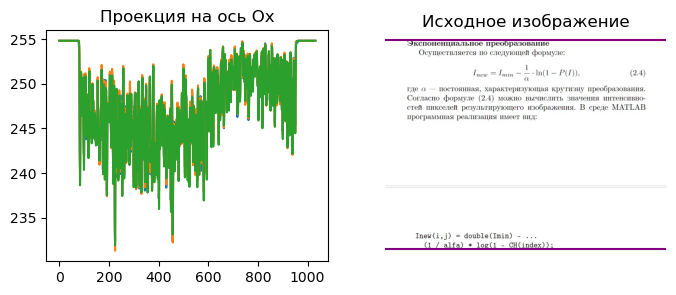

Границы:  640.40234375 ... 1027.96875


In [9]:
plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
plt.title('Проекция на ось Ox')
plt.plot(img.mean(axis=0))

plt.subplot(1, 2, 2)
plt.title('Исходное изображение')
plt.imshow(img)
plt.axis('off')
plt.axhline(y=15, color='purple', linestyle='-')
plt.axhline(y=780, color='purple', linestyle='-')
plt.show()

ProjXK = np.sum(img, (1,2))
ProjXK = ProjXK / 256 / img.shape[2]
print("Границы: ", ProjXK.min(), "...", ProjXK.max())

При проекции на Oy можно определить границы текста и наличие других элементов (например, полоски, разделяющей страницы)

**3. Профили. Выбрать произвольное изображение, содержащие штрих-код. Выполнить построение профиля изображения вдоль штрих-кода.**

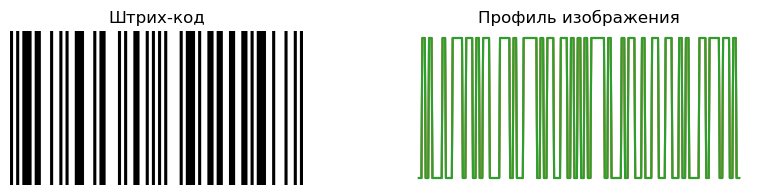

In [10]:
I = cv2 . imread ("barcode.jpg", cv2. IMREAD_COLOR )
profile = I[round(I.shape[0] / 2), :]

plt.figure(figsize=(10,2))
plt.subplot(1, 2, 1)
plt.title('Штрих-код')
plt.imshow(I)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Профиль изображения')
plt.plot(profile)
plt.axis('off')
plt.show()